This document shows the process of creating the list of all possible mutations within the dataset and the computing of the variance plot.
Please exchange the data input before running.

STEPS:
1. download the data
2. split the mutant_name to the single mutation_names in different columns
3. generate a list with all the possible mutations of the dataset
--> all_possible_mutations
4. for each mutation: checking the mutants if they contain this mutation
--> dataframe with boolians and mutations as columns and mutants as rows
--> additionaly put the mutcount of each mutant as a columns, so the rows can be adressed by the containing mutations and the mutcount
5. variance calculation: within one mutation column search for all with the same mutcount and calculate the variance of the resulting group -> variance within one mut count for one mutation
6. plot it for all mutations and all mutcounts


In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

In [4]:
# read dataset
original_dms_data = pd.read_csv('/Users/liza/Documents/Bioinfo Project/DMS_data/AAAA_GFP_dms_data_original_komplett.csv')
# split first column of df into multiple columns
original_dms_data_col = original_dms_data
only_mutants = original_dms_data["mutant"].to_frame()
original_dms_data_col[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']] = original_dms_data_col['mutant'].str.split(':', 15, expand=True)
original_dms_data_col.head()


/var/folders/sk/q8h0c3zs1v9dt93y5m134swr0000gn/T/ipykernel_16747/600977013.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  original_dms_data_col[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']] = original_dms_data_col['mutant'].str.split(':', 15, expand=True)


,mutant,mutated_sequence,DMS_score,DMS_score_bin,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15
0,K3R:V55A:Q94R:A110T:D117G:M153K:D216A,MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,1.301030,0,K3R,V55A,Q94R,A110T,D117G,M153K,D216A,None,None,None,None,None,None,None,None
1,K3Q:V16A:I167T:L195Q,MSQGEELFTGVVPILAELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.137350,1,K3Q,V16A,I167T,L195Q,None,None,None,None,None,None,None,None,None,None,None
2,K3Q:Y143C:N164D:S205P:A227T,MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,1.553913,0,K3Q,Y143C,N164D,S205P,A227T,None,None,None,None,None,None,None,None,None,None
3,K3Q:Y143N:V193A,MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.404237,1,K3Q,Y143N,V193A,None,None,None,None,None,None,None,None,None,None,None,None
4,K3R,MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.738586,1,K3R,None,None,None,None,None,None,None,None,None,None,None,None,None,None


new dataframe from new columns: (WORKING_DATAFRAME)
- Mutation count from df_mutation_counts
- fscore from original_dms_data_col
- m1 to m11 from original_dms_data_col

In [5]:
# count how many mutations each sequence has
list_mut_count_in_progress = []
for i in range(len(original_dms_data['mutant'])):
    list_mut_count_in_progress.append(original_dms_data['mutant'].iloc[i].count(':'))
list_mut_count_prae = np.array(list_mut_count_in_progress)
list_mut_count = (list_mut_count_prae + 1)
df_mutation_counts = pd.DataFrame(list_mut_count)

In [6]:
working_dataframe_prae = pd.concat([original_dms_data_col, df_mutation_counts], axis="columns")
#more convenient dataframe
working_dataframe = working_dataframe_prae.drop(['mutant', 'mutated_sequence', 'DMS_score_bin'], axis=1)
working_dataframe.rename(columns={working_dataframe.columns[16]: 'mut_count'}, inplace=True)
working_dataframe.head()

,DMS_score,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,mut_count
0,1.301030,K3R,V55A,Q94R,A110T,D117G,M153K,D216A,None,None,None,None,None,None,None,None,7
1,3.137350,K3Q,V16A,I167T,L195Q,None,None,None,None,None,None,None,None,None,None,None,4
2,1.553913,K3Q,Y143C,N164D,S205P,A227T,None,None,None,None,None,None,None,None,None,None,5
3,3.404237,K3Q,Y143N,V193A,None,None,None,None,None,None,None,None,None,None,None,None,3
4,3.738586,K3R,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1


In [7]:
working_dataframe_only_ms = working_dataframe.loc[:, ["m1", "m2", "m3", 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15']]
working_dataframe_only_ms.head()


,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15
0,K3R,V55A,Q94R,A110T,D117G,M153K,D216A,None,None,None,None,None,None,None,None
1,K3Q,V16A,I167T,L195Q,None,None,None,None,None,None,None,None,None,None,None
2,K3Q,Y143C,N164D,S205P,A227T,None,None,None,None,None,None,None,None,None,None
3,K3Q,Y143N,V193A,None,None,None,None,None,None,None,None,None,None,None,None
4,K3R,None,None,None,None,None,None,None,None,None,None,None,None,None,None


1. transform all values from the dataframe with values.flatten() -> list of all values (1D)
2. tolist() : normal pandas list
3. transform list into a set (every value only once)
4. transform set back into list

In [8]:
all_possible_mutations = working_dataframe_only_ms.values.flatten().tolist()
all_possible_mutations = list(set(all_possible_mutations))
#one none value: drop
while None in all_possible_mutations:
    all_possible_mutations.remove(None)
print(all_possible_mutations)

['L18M', 'Y106G', 'H199Q', 'A110T', 'G138A', 'S72G', 'C48W', 'K41M', 'D197S', 'F100Y', 'I152G', 'G134D', 'N149Y', 'A110V', 'N149S', 'D190H', 'I167V', 'V150S', 'K131R', 'E32M', 'F84L', 'E6A', 'Q69E', 'E111K', 'L220P', 'K166I', 'I161G', 'Y151C', 'E34D', 'N212Y', 'L236M', 'S65A', 'I152D', 'V29M', 'T63A', 'M233T', 'K52L', 'Y74H', 'D129G', 'F8I', 'G104S', 'T186I', 'G20V', 'N164C', 'F27Y', 'V176E', 'E17T', 'W57S', 'T118L', 'L15Q', 'H81A', 'V219L', 'Y151H', 'P13R', 'H231P', 'V11A', 'Y237H', 'G104V', 'P196A', 'N121C', 'M78V', 'G24R', 'K79G', 'L207P', 'S72I', 'T186A', 'M153R', 'S147T', 'D216N', 'F46H', 'K126G', 'N198F', 'P196H', 'K3N', 'I123V', 'K45W', 'N135G', 'K214T', 'F46Y', 'E95K', 'N164H', 'L201H', 'W57R', 'D173V', 'G174A', 'L42W', 'H169R', 'L42P', 'N135V', 'K85V', 'N105T', 'E124K', 'Y74L', 'K214I', 'T108P', 'F223L', 'K162Q', 'N198G', 'K156W', 'N164S', 'H199P', 'P54L', 'H77Q', 'V12E', 'P13A', 'S147A', 'P56S', 'D216A', 'A37D', 'P58T', 'T59S', 'I128T', 'L60T', 'F83S', 'L15P', 'I123M', 'K45T'

In [11]:
only_mutants_list = only_mutants['mutant']


In [12]:
#boolians if mutation excist in mutant
list_of_dfs = []


for i in all_possible_mutations:
    new_column_name = f'{i}'
    new_column_values = [only_mutants_list.str.contains(i, regex= False)]
    new_df = pd.DataFrame({new_column_name: new_column_values})
    new_df_exploded = new_df.explode(new_column_name)
    list_of_dfs.append(new_df_exploded)


result_how_often = pd.concat(list_of_dfs, axis=1)
result_how_often = result_how_often.reset_index(drop=True)



TEST: try out on one value (theory behind variance calculation)

In [28]:
# dataframe aus original machen der nur mutcount und fscore hat
count_fscore_frame = working_dataframe[['DMS_score', 'mut_count']]


In [14]:
K166Q_count_fscore = count_fscore_frame.loc[result_how_often['K166Q'] == True]
fscore_2_K166Q = K166Q_count_fscore['DMS_score'].loc[K166Q_count_fscore['mut_count'] == 2]
varianz_K166Q = fscore_2_K166Q.var()
varianz_K166Q

0.015426224360537455

In [15]:
#comparisment with other mutation
K3R_count_fscore = count_fscore_frame.loc[result_how_often['K3R'] == True]
fscore_2_K3R = K3R_count_fscore['DMS_score'].loc[K3R_count_fscore['mut_count'] == 2]
varianz_K3R = fscore_2_K3R.var()
varianz_K3R

0.2736357484727858

--> K166Q "better" than K3R -> matches the paper

TEST 2: tranform the code to calculate it for all mutations at once
-> mutcount =2, for all mutations


In [16]:
variance_per_mutant_2_list = []

for i in all_possible_mutations:
    mut_count_fscore_2 = count_fscore_frame.loc[result_how_often[i] == True]
    fscore_2_mut = mut_count_fscore_2['DMS_score'].loc[mut_count_fscore_2['mut_count'] == 2]
    varianz_mut_2 = fscore_2_mut.var()
    variance_per_mutant_2_list.append(varianz_mut_2)

variance_per_mutant_2_series = pd.Series(variance_per_mutant_2_list, index=all_possible_mutations)
variance_per_mutant_2_df = variance_per_mutant_2_series.to_frame()


In [18]:
#how much data is available to calculate
how_many_for_variance_2 = []

for i in all_possible_mutations:
    mut_count_fscore_2 = count_fscore_frame.loc[result_how_often[i] == True]
    fscore_2_mut = mut_count_fscore_2['DMS_score'].loc[mut_count_fscore_2['mut_count'] == 2]
    wie_viel_jeweils_2 = len(fscore_2_mut)
    how_many_for_variance_2.append(wie_viel_jeweils_2)

how_many_for_variance_2 = pd.Series(how_many_for_variance_2, index=all_possible_mutations)
how_many_for_variance_2_df = how_many_for_variance_2.to_frame()


In [26]:
how_many_AND_variance_df_2 = pd.concat([how_many_for_variance_2_df, variance_per_mutant_2_df], axis = 1)
how_many_AND_variance_df_2.columns = ['AOD', 'Variance']
how_many_AND_variance_df_2 = how_many_AND_variance_df_2.dropna()


,AOD,Variance
L18M,4,0.004253
H199Q,4,1.106825
S72G,85,0.126306
K41M,16,0.014800
F100Y,22,0.029206
...,...,...
I47N,10,0.039427
G4C,3,0.000631
G232D,12,0.013126
A179T,13,0.333306


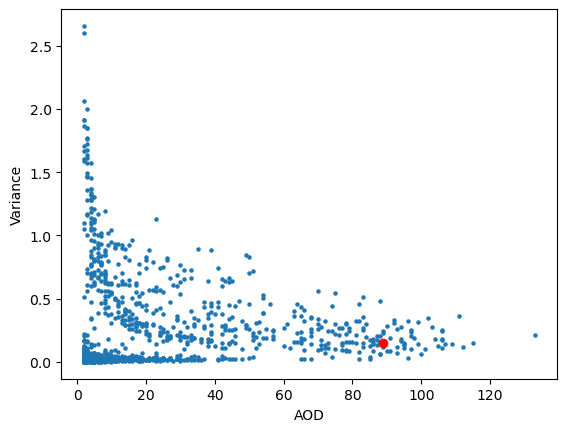

In [27]:
import matplotlib.pyplot as plt
#scatter plot
plt.scatter(how_many_AND_variance_df_2['AOD'],how_many_AND_variance_df_2['Variance'], s = 5 )
plt.xlabel('AOD')
plt.ylabel('Variance')
#highest ranked mutation (V163A) from paper: marked red
plt.scatter(how_many_AND_variance_df_2['AOD']['V163A'],how_many_AND_variance_df_2['Variance']['V163A'], c='red')
# Diagramm anzeigen
plt.show()

--> IMPORTANT values: low variance and high count for used values

FINALLY:
--> change code to run it for all mutations

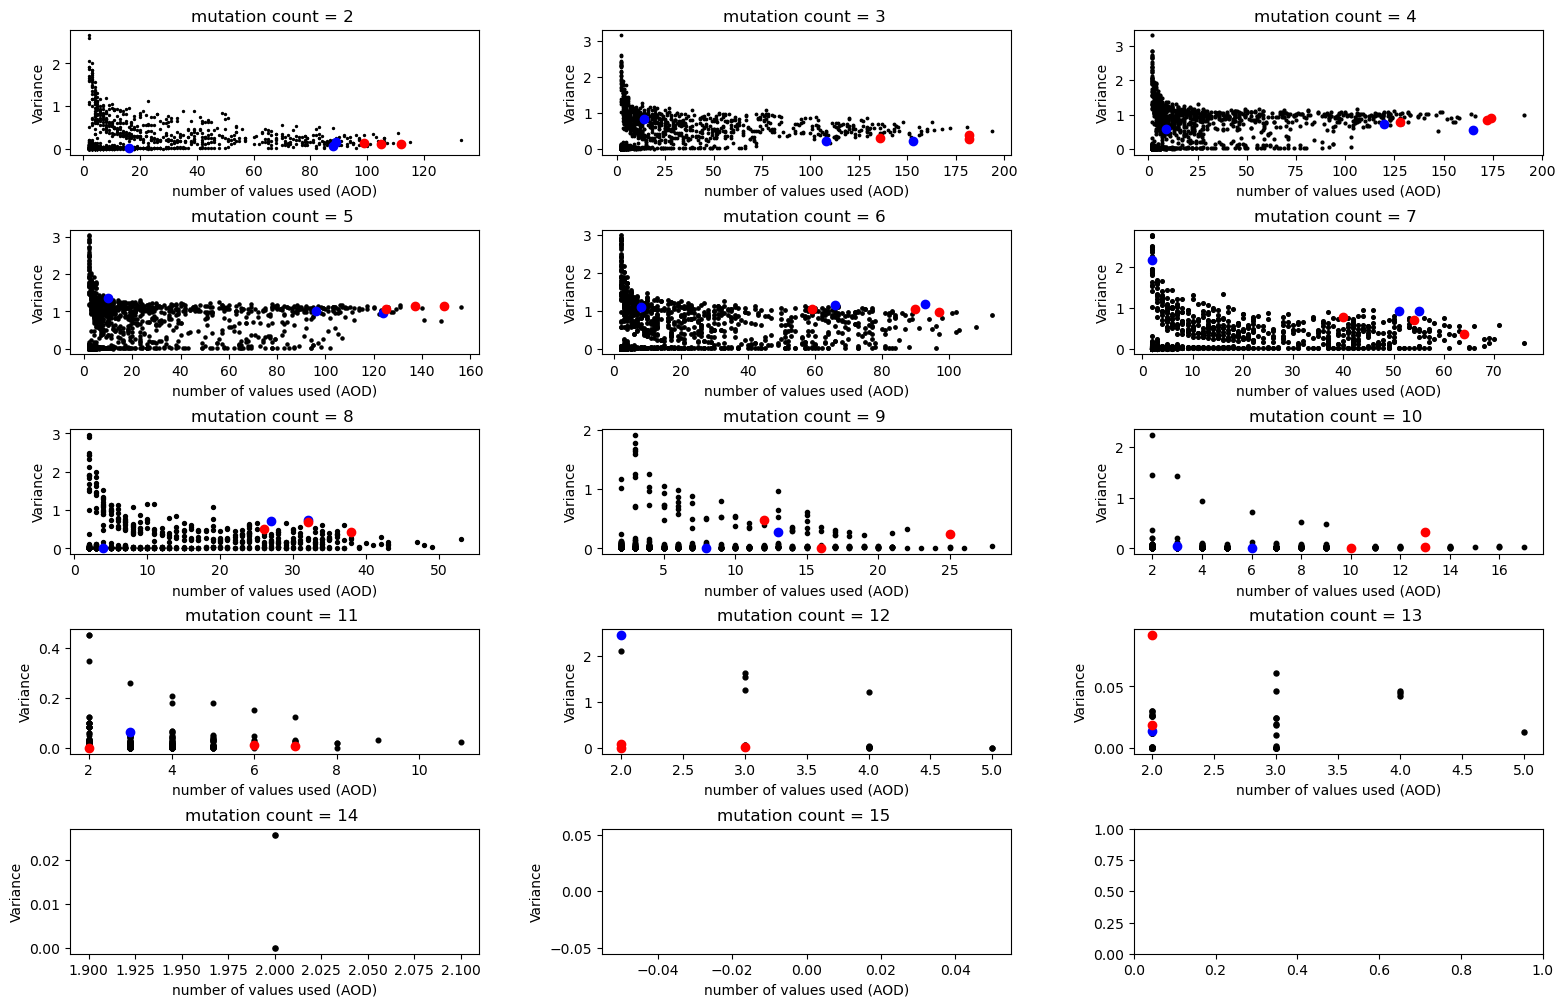

In [24]:

import matplotlib.pyplot as plt
list_paper_mutations = ['V163A', 'K166Q', 'I171V']
list_pedigree_mutations = ['K113R', 'K214E', 'K156R']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(19, 12))  #plots modelling
plt.subplots_adjust(wspace=0.3, hspace=0.6)

for j, ax in zip(range(2, 16), axes.flatten()):
    variance_per_mutant_list = []

    for i in all_possible_mutations:
        mut_count_fscore = count_fscore_frame.loc[result_how_often[i] == True]
        fscore_mut = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j]
        varianz_mut = fscore_mut.var()
        variance_per_mutant_list.append(varianz_mut)

    variance_per_mutant_series = pd.Series(variance_per_mutant_list, index=all_possible_mutations)
    variance_per_mutant_df = variance_per_mutant_series.to_frame()

    how_many_for_variance = []

    for i in all_possible_mutations:
        mut_count_fscore = count_fscore_frame.loc[result_how_often[i] == True]
        fscore_mut = mut_count_fscore['DMS_score'].loc[mut_count_fscore['mut_count'] == j]
        wie_viel_jeweils = len(fscore_mut)
        how_many_for_variance.append(wie_viel_jeweils)

    how_many_for_variance = pd.Series(how_many_for_variance, index=all_possible_mutations)
    how_many_for_variance_df = how_many_for_variance.to_frame()


    how_many_AND_variance_df = pd.concat([how_many_for_variance_df, variance_per_mutant_df], axis = 1)
    how_many_AND_variance_df.columns = ['Anzahl benutzter Werte', 'Varianz']
    how_many_AND_variance_df = how_many_AND_variance_df.dropna()

#scatter plot
    ax.scatter(how_many_AND_variance_df['Anzahl benutzter Werte'], how_many_AND_variance_df['Varianz'], s=j, color='black')
    ax.set_xlabel('number of values used (AOD)')
    ax.set_ylabel('Variance')

    for k in list_paper_mutations:
        if k in how_many_AND_variance_df.index:
            ax.scatter(how_many_AND_variance_df['Anzahl benutzter Werte'][k],how_many_AND_variance_df['Varianz'][k], c='blue')
    for l in list_pedigree_mutations:
        if l in how_many_AND_variance_df.index:
            ax.scatter(how_many_AND_variance_df['Anzahl benutzter Werte'][l],how_many_AND_variance_df['Varianz'][l], c='red')
    ax.set_title(f'mutation count = {j} ')

# Set the background color to white
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
# Diagramm anzeigen
plt.savefig('variances_scatterplot.png', dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())

plt.show()
